In [44]:
# First, we can import some functions so we can use the model
from cobra.io import read_sbml_model, write_sbml_model
from cobra import Reaction, Metabolite
import matplotlib.pyplot as plt

# Second, we can read the GEM and save it as ‘model’
model = read_sbml_model('data/iML1515_het.xml')

## First, we can evaluate the theoretical max P3HB production on Glucose:

In [37]:
with model:
    r_phaC_exp = model.add_boundary(model.metabolites.get_by_id('P3HB_c'), type='sink')
    model.objective = r_phaC_exp
    P3HB_production = model.optimize().objective_value
    print("Max. p3HB production [mmol gDW^-1 h^-1]:", P3HB_production)
    print("Theoretical max. yield [mmol-P3HB / mmol-glucose]:", P3HB_production / (-1 * model.reactions.get_by_id('EX_glc__D_e').flux))
    max_yield_mmol_glc = P3HB_production / (-1*model.reactions.get_by_id('EX_glc__D_e').flux)

Max. p3HB production [mmol gDW^-1 h^-1]: 1.2500530973451296
Theoretical max. yield [mmol-P3HB / mmol-glucose]: 0.12500530973451296


## We create the media for growth in Acetate and in Glycerol:

In [38]:
acetate_medium = model.medium
acetate_medium['EX_glc__D_e'] = 0
acetate_medium['EX_ac_e'] = 10


In [39]:
glycerol_medium = model.medium
glycerol_medium['EX_glc__D_e'] = 0
glycerol_medium['EX_glyc_e'] = 10

## Now, let's evaluate the theoretical max P3HB production on Acetate:

In [40]:
with model:    
    model.medium = acetate_medium
    r_phaC_exp = model.add_boundary(model.metabolites.get_by_id('P3HB_c'), type='sink')
    model.objective = r_phaC_exp
    P3HB_production = model.optimize().objective_value
    print("Max. p3HB production [mmol gDW^-1 h^-1]:", P3HB_production)
    print("Theoretical max. yield [mmol-P3HB / mmol-acetate]:", P3HB_production / (-1 * model.reactions.get_by_id('EX_ac_e').flux))
    max_yield_mmol_ace = P3HB_production / (-1*model.reactions.get_by_id('EX_ac_e').flux)

Max. p3HB production [mmol gDW^-1 h^-1]: 0.3424000000000009
Theoretical max. yield [mmol-P3HB / mmol-acetate]: 0.03424000000000009


## Let's do the same on Glycerol:

In [41]:
with model:    
    model.medium = glycerol_medium
    r_phaC_exp = model.add_boundary(model.metabolites.get_by_id('P3HB_c'), type='sink')
    model.objective = r_phaC_exp
    P3HB_production = model.optimize().objective_value
    print("Max. p3HB production [mmol gDW^-1 h^-1]:", P3HB_production)
    print("Theoretical max. yield [mmol-P3HB / mmol-glycerol]:", P3HB_production / (-1 * model.reactions.get_by_id('EX_glyc_e').flux))
    max_yield_mmol_gly = P3HB_production / (-1*model.reactions.get_by_id('EX_glyc_e').flux)

Max. p3HB production [mmol gDW^-1 h^-1]: 0.6869909909909928
Theoretical max. yield [mmol-P3HB / mmol-glycerol]: 0.06869909909909928


## We now plot the data:

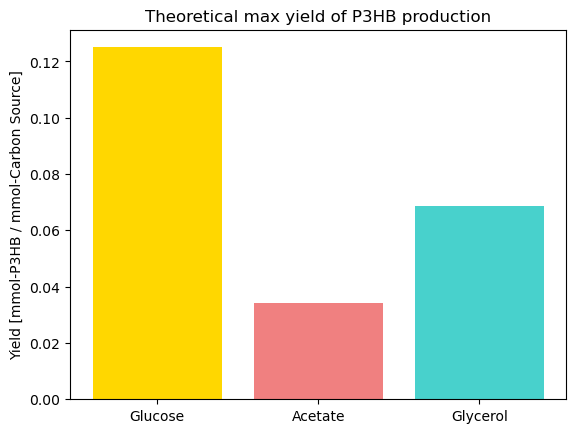

In [50]:
Carbon_sources = ['Glucose', 'Acetate', 'Glycerol']
Yields = [max_yield_mmol_glc, max_yield_mmol_ace, max_yield_mmol_gly]
colors = ('gold', 'lightcoral', 'mediumturquoise')

plt.bar(Carbon_sources, Yields, color=colors)

plt.ylabel('Yield [mmol-P3HB / mmol-Carbon Source]')
plt.title('Theoretical max yield of P3HB production')

plt.show()